In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from New_GUI_Analysis_Functions import *

%matplotlib widget

In [2]:
DVC_data = pd.read_csv('/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/DVC_data/All_Aggregated_data_single_housed/20240923_tracking_distance_cleaned.csv') 

#convert to dataframe
DVC_data = pd.DataFrame(DVC_data)

In [3]:
DVC_data_pairs = pd.read_csv('/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/DVC_data/All_Aggregated_data_pairs/20240912_Activity_cleaned_Pairs.csv')

#convert to dataframe
DVC_data_pairs = pd.DataFrame(DVC_data_pairs)

In [4]:
#collapse the rows of data with the same hour 
DVC_data = DVC_data.groupby(['hour']).mean()

#delete the day column
DVC_data = DVC_data.drop(columns=['day'])

In [5]:
DVC_data_pairs = DVC_data_pairs.groupby(['hour']).mean()

#delete the day column
DVC_data_pairs = DVC_data_pairs.drop(columns=['day']) 

In [6]:
DVC_data.keys()

Index(['309562_GNB1_309562', '322579___WT_322579', '322583___WT_322583',
       '322581___WT_322581', '322558_WT_322558', '322562_WT_322562',
       '322368___GNB1_355368', '322566___WT_322566', '355378___GNB1_355378',
       '355377_GNB1_355377', '322582___WT_322582', '355369_GNB1_355369',
       '355379_GNB1_355379', '322569_WT_322569', '322570_WT_322570',
       '322580___WT_322580'],
      dtype='object')

In [9]:
DVC_data

,309562_GNB1_309562,322579___WT_322579,322583___WT_322583,322581___WT_322581,322558_WT_322558,322562_WT_322562,322368___GNB1_355368,322566___WT_322566,355378___GNB1_355378,355377_GNB1_355377,322582___WT_322582,355369_GNB1_355369,355379_GNB1_355379,322569_WT_322569,322570_WT_322570,322580___WT_322580
hour,,,,,,,,,,,,,,,,
0,6.217509,18.636792,15.797786,8.494299,9.451036,6.393899,16.388493,5.407552,12.399577,28.182576,14.339706,24.343266,8.121685,19.498568,14.055292,4.809197
1,4.872295,7.713537,1.850930,4.534982,13.085020,6.384284,13.390442,3.117718,8.356036,27.767674,10.950477,14.602492,6.375875,8.016275,7.763070,3.825403
2,4.976880,8.037348,7.835798,3.696058,10.246449,4.727557,11.596102,3.588714,4.555170,23.605241,3.086408,13.136414,6.368964,11.535635,10.191471,3.370152
3,3.216633,5.260729,9.963942,7.526012,9.002803,5.958690,4.785412,3.000803,2.699205,18.363520,1.394294,19.468523,5.705103,10.652566,6.617723,1.974747
4,3.777244,3.459561,2.120504,5.914019,13.229290,3.631332,4.398050,4.165733,1.521944,23.177269,2.820626,26.184443,5.596234,7.602410,10.357523,2.524811
5,0.912560,3.333696,10.002780,7.983152,14.464454,4.062118,5.265996,3.736083,2.125297,21.857246,3.596148,25.511707,4.505641,7.935058,8.373190,5.038298
6,3.400575,6.821268,10.914768,9.179908,10.472052,1.918974,6.234697,4.355616,2.146380,18.224049,0.199353,26.306704,2.445545,2.200620,7.992832,7.954582
7,10.457480,3.379152,5.353595,11.369295,6.403012,1.820459,10.040498,3.486902,6.536230,8.741832,4.196203,16.988565,0.631512,1.100144,7.519434,11.050733
8,9.489487,3.038793,2.811891,10.153951,5.576712,2.437924,9.080469,5.240847,5.963927,7.398804,11.343116,4.425203,1.526927,3.766507,14.118371,7.315511


In [7]:
def plot_genotype_data(DVC_data, genotype, fig, ax, color):
    """
    Plots the mean and variance for the specified genotype across all hours in the dataset.

    Parameters:
    - DVC_data: DataFrame containing distance traveled data for each hour.
    - genotype: String that specifies the genotype to filter by ('WT' or 'GNB1').
    - fig: The figure object to plot on.
    - ax: The axis object to plot on.
    - color: The color for the plot.
    """
    # Filter the columns that match the genotype
    genotype_columns = [column for column in DVC_data.columns if genotype in column]
    
    # Extract only the genotype columns and convert to numpy array
    genotype_data = DVC_data[genotype_columns].to_numpy()
    
    # Calculate the mean and variance across the columns for each hour
    mean_data = np.mean(genotype_data, axis=1)
    variance_data = np.var(genotype_data, axis=1)
    std_dev = np.sqrt(variance_data)  # Standard deviation
    
    # Get the hours from the index and convert to numpy array
    hours = DVC_data.index.to_numpy()

    ax.plot(hours, mean_data, label=f'{genotype} Mean N = {len(genotype_columns)}', color=color)

    # Fill between mean ± standard deviation
    ax.fill_between(hours, mean_data - std_dev, mean_data + std_dev, alpha=0.2, label=f'{genotype} Variance', color=color)


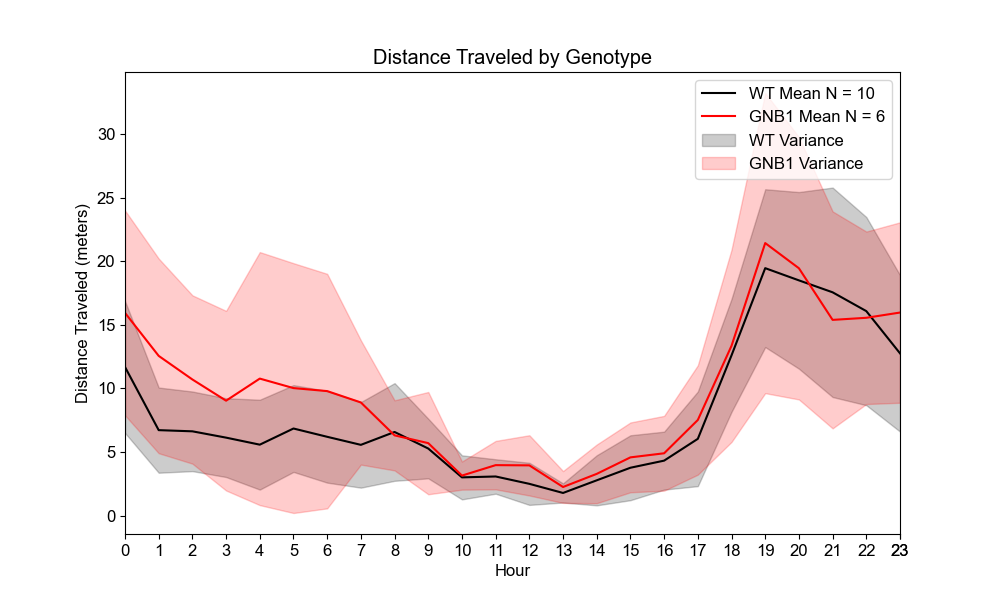

In [8]:
# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Example usage for WT
plot_genotype_data(DVC_data, 'WT', fig, ax, 'black')

# Example usage for GNB1
plot_genotype_data(DVC_data, 'GNB1', fig, ax, 'red')

ax.set_title('Distance Traveled by Genotype')

ax.set_xlabel('Hour')
ax.set_ylabel('Distance Traveled (meters)')
ax.legend(loc='best')

# Set x-ticks every 2 hours, including 23
ax.set_xticks(np.arange(0, 24, 1))
ax.set_xticks(np.append(ax.get_xticks(), 23))  # Explicitly add 23 to the x-ticks

# Set x-axis range to include 0 to 23
ax.set_xlim(0, 23)

# # Save the figure as a PNG and SVG
# plt.savefig('/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/DVC_data/All_Aggregated_data_single_housed/DVC_data_plot.png')
# 
# plt.savefig('/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/DVC_data/All_Aggregated_data_single_housed/DVC_data_plot.svg')

# Show the plot
plt.show()

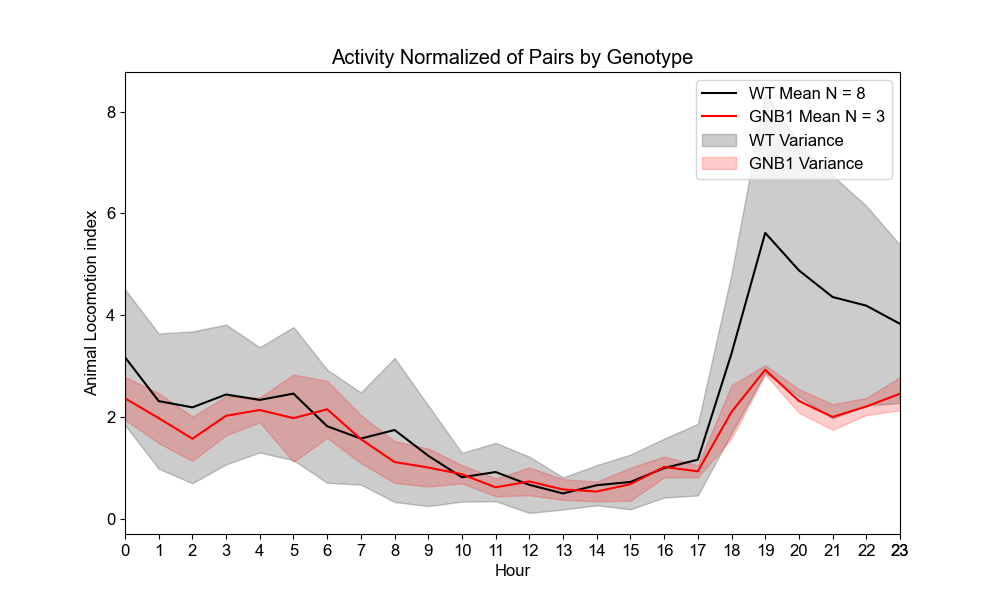

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Example usage for WT
plot_genotype_data(DVC_data_pairs, 'WT', fig, ax, 'black')

# Example usage for GNB1
plot_genotype_data(DVC_data_pairs, 'GNB1', fig, ax, 'red')

ax.set_title('Activity Normalized of Pairs by Genotype')
ax.set_xlabel('Hour')
ax.set_ylabel('Animal Locomotion index')
ax.legend(loc='best')

# Set x-ticks every 2 hours, including 23
ax.set_xticks(np.arange(0, 24, 1))
ax.set_xticks(np.append(ax.get_xticks(), 23))  # Explicitly add 23 to the x-ticks

# Set x-axis range to include 0 to 23
ax.set_xlim(0, 23)

# # Save the figure as a PNG and SVG
# plt.savefig('/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/DVC_data/All_Aggregated_data_single_housed/DVC_data_plot.png')
# 
# plt.savefig('/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/DVC_data/All_Aggregated_data_single_housed/DVC_data_plot.svg')

# Show the plot
plt.show()